In [2]:
# Stock Price Prediction Using Machine Learning

#This project analyzes stock market data from Kaggle to build and evaluate machine learning models for predicting stock price movements. 
# We'll use the dataset available at: https://www.kaggle.com/datasets/paultimothymooney/stock-market-data

## Project Overview
#- **Objective**: Predict stock price direction (up/down) using historical data
#- **Dataset**: Stock market data from Kaggle
#- **Approach**: Compare multiple ML models and select the best performer
#- **Evaluation**: Use precision, recall, accuracy, and other metrics


In [3]:
# Install required packages
!pip install kaggle yfinance scikit-learn matplotlib seaborn plotly pandas numpy

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------------- -------------------------- 1.0/3.0 MB 2.5 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 2.5 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 3.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 3.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 2.2 MB/s eta 0:0

In [2]:
# Cell 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")


All libraries imported successfully!


In [3]:
import sys
!{sys.executable} -m pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.0/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.3/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 1.6/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 1.8/150.0 MB 1.8 MB/s eta 0:01:23
    --------------------------------------- 2.1/150.0 MB 1.8 MB/s eta 0:01:25
    --------------------------------------- 2.6/150.0 MB 1.8 MB/s eta 0:01:24
    --------------------------------------- 2.9/150.0 MB 1.8 MB/s eta 0:01:24
    --------------------------------------- 3.1/150.0 MB 1.7 MB/s eta 0:01:27
    --------------------------------------- 3.7/150.0 MB 1.8 MB/s eta 0:01:24
   - -------------------------------------- 4.2/150.0 MB 1.8 MB/s eta 0:01:20
   - -------------------------------------- 4.7/150.0 MB 1.8 MB/s eta 0

In [4]:
# Cell 2: Load and Explore the Dataset
# Load the BKQNY dataset
df = pd.read_csv('BKQNY.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (2606, 7)

First 5 rows:
         Date        Low       Open  Volume       High      Close  \
0  03-08-2012  15.470000  15.470000       0  15.470000  15.470000   
1  06-08-2012  15.850000  15.850000     200  15.850000  15.850000   
2  07-08-2012  16.049999  16.049999     600  16.049999  16.049999   
3  08-08-2012  16.049999  16.049999       0  16.049999  16.049999   
4  09-08-2012  16.049999  16.049999       0  16.049999  16.049999   

   Adjusted Close  
0        9.793281  
1       10.033838  
2       10.160446  
3       10.160446  
4       10.160446  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2606 non-null   object 
 1   Low             2606 non-null   float64
 2   Open            2606 non-null   float64
 3   Volume          2606 non-null   int64  
 4   High            2606 non-null

In [5]:
# Cell 3: Data Cleaning and Preprocessing
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Remove any rows with missing values if they exist
df = df.dropna()

# Display cleaned dataset info
print(f"\nCleaned dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")


Missing values:
Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

Cleaned dataset shape: (2606, 7)
Date range: 2012-08-03 00:00:00 to 2022-12-09 00:00:00


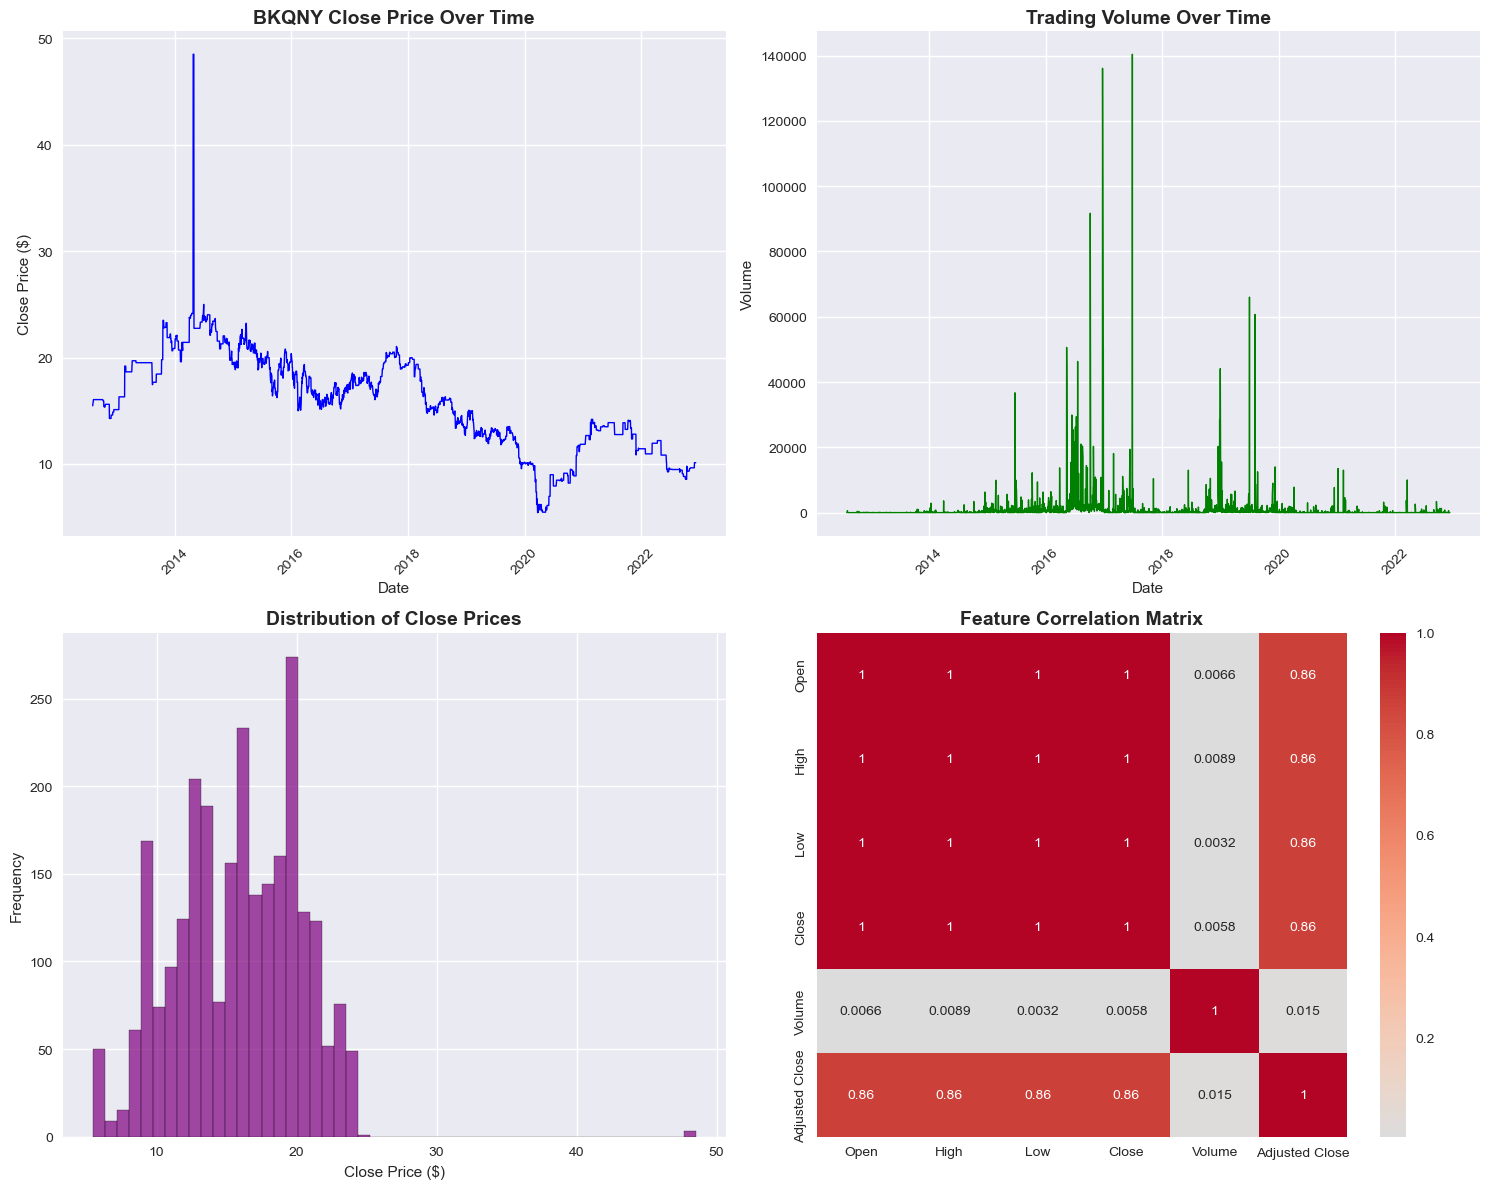

Key Statistics:
Average Close Price: $15.79
Price Volatility (Std Dev): $4.47
Maximum Price: $48.51
Minimum Price: $5.43
Average Daily Volume: 1027


In [6]:
# Cell 4: Exploratory Data Analysis and Visualization
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Close price over time
axes[0,0].plot(df['Date'], df['Close'], linewidth=1, color='blue')
axes[0,0].set_title('BKQNY Close Price Over Time', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Volume over time
axes[0,1].plot(df['Date'], df['Volume'], linewidth=1, color='green')
axes[0,1].set_title('Trading Volume Over Time', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Volume')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Price distribution
axes[1,0].hist(df['Close'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1,0].set_title('Distribution of Close Prices', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Close Price ($)')
axes[1,0].set_ylabel('Frequency')

# Plot 4: Correlation heatmap
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights
print("Key Statistics:")
print(f"Average Close Price: ${df['Close'].mean():.2f}")
print(f"Price Volatility (Std Dev): ${df['Close'].std():.2f}")
print(f"Maximum Price: ${df['Close'].max():.2f}")
print(f"Minimum Price: ${df['Close'].min():.2f}")
print(f"Average Daily Volume: {df['Volume'].mean():.0f}")


In [7]:
# Cell 5: Feature Engineering
# Create technical indicators and features
def create_features(df):
    df = df.copy()
    
    # Price-based features
    df['Price_Range'] = df['High'] - df['Low']
    df['Price_Change'] = df['Close'] - df['Open']
    df['Price_Change_Pct'] = (df['Close'] - df['Open']) / df['Open'] * 100
    
    # Moving averages
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    
    # Volatility indicators
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()
    
    # Price momentum
    df['Momentum_5'] = df['Close'] - df['Close'].shift(5)
    df['Momentum_10'] = df['Close'] - df['Close'].shift(10)
    
    # Volume indicators
    df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_MA_5']
    
    # Lag features (previous day values)
    df['Close_Lag1'] = df['Close'].shift(1)
    df['Close_Lag2'] = df['Close'].shift(2)
    df['Close_Lag3'] = df['Close'].shift(3)
    
    # RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    return df

# Apply feature engineering
df_features = create_features(df)

print("Feature engineering completed!")
print(f"New dataset shape: {df_features.shape}")
print("\nNew features created:")
new_features = [col for col in df_features.columns if col not in df.columns]
print(new_features)


Feature engineering completed!
New dataset shape: (2606, 23)

New features created:
['Price_Range', 'Price_Change', 'Price_Change_Pct', 'MA_5', 'MA_10', 'MA_20', 'Volatility_5', 'Volatility_10', 'Momentum_5', 'Momentum_10', 'Volume_MA_5', 'Volume_Ratio', 'Close_Lag1', 'Close_Lag2', 'Close_Lag3', 'RSI']


In [8]:
# Cell 6: Prepare Data for Machine Learning
# Select features for modeling
feature_columns = [
    'Open', 'High', 'Low', 'Volume', 'Adjusted Close',
    'Price_Range', 'Price_Change', 'Price_Change_Pct',
    'MA_5', 'MA_10', 'MA_20',
    'Volatility_5', 'Volatility_10',
    'Momentum_5', 'Momentum_10',
    'Volume_MA_5', 'Volume_Ratio',
    'Close_Lag1', 'Close_Lag2', 'Close_Lag3',
    'RSI'
]

# Target variable
target = 'Close'

# Remove rows with NaN values (due to rolling calculations)
df_clean = df_features.dropna()

# Prepare X and y
X = df_clean[feature_columns]
y = df_clean[target]

print(f"Final dataset shape: {df_clean.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Date range: {df_clean['Date'].min()} to {df_clean['Date'].max()}")

# Check for any remaining missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")


Final dataset shape: (1912, 23)
Features shape: (1912, 21)
Target shape: (1912,)
Date range: 2012-10-08 00:00:00 to 2022-12-07 00:00:00

Missing values in features: 0
Missing values in target: 0


In [9]:
# Cell 7: Split Data and Scale Features
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # Don't shuffle to maintain time series order
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Also create MinMax scaled versions for neural networks
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("Data scaling completed!")


Training set size: 1529 samples
Test set size: 383 samples
Data scaling completed!


In [10]:
# Cell 8: Define Model Evaluation Function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train model and return comprehensive evaluation metrics
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Calculate accuracy (percentage of predictions within 5% of actual)
    train_accuracy = np.mean(np.abs((y_train - y_train_pred) / y_train) <= 0.05) * 100
    test_accuracy = np.mean(np.abs((y_test - y_test_pred) / y_test) <= 0.05) * 100
    
    results = {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Predictions': y_test_pred
    }
    
    return results

print("Model evaluation function defined!")


Model evaluation function defined!


In [12]:
# Cell 9: Train and Evaluate Multiple Models
import xgboost as xgb  # Add this import line

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'SVM (RBF)': SVR(kernel='rbf', C=100, gamma='scale'),
    'SVM (Linear)': SVR(kernel='linear', C=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
}

# Store results
results_list = []

print("Training and evaluating models...")
print("=" * 60)

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use appropriate scaling for different models
    if name in ['SVM (RBF)', 'SVM (Linear)', 'Neural Network']:
        # Use StandardScaler for SVM and Neural Networks
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        # Use original features for tree-based models
        X_train_use = X_train
        X_test_use = X_test
    
    try:
        results = evaluate_model(model, X_train_use, X_test_use, y_train, y_test, name)
        results_list.append(results)
        print(f"✓ {name} completed - Test R²: {results['Test_R2']:.4f}")
    except Exception as e:
        print(f"✗ {name} failed: {str(e)}")

print("=" * 60)
print("All models trained successfully!")



Training and evaluating models...
Training Linear Regression...
✓ Linear Regression completed - Test R²: 1.0000
Training Ridge Regression...
✓ Ridge Regression completed - Test R²: 0.9999
Training Lasso Regression...
✓ Lasso Regression completed - Test R²: 0.9399
Training Decision Tree...
✓ Decision Tree completed - Test R²: 0.7018
Training Random Forest...
✓ Random Forest completed - Test R²: 0.6800
Training Gradient Boosting...
✓ Gradient Boosting completed - Test R²: 0.6832
Training XGBoost...
✓ XGBoost completed - Test R²: 0.6902
Training SVM (RBF)...
✓ SVM (RBF) completed - Test R²: -0.7206
Training SVM (Linear)...
✓ SVM (Linear) completed - Test R²: 0.9992
Training Neural Network...
✓ Neural Network completed - Test R²: 0.9179
All models trained successfully!


In [13]:
# Cell 10: Model Performance Comparison
# Create results DataFrame
results_df = pd.DataFrame(results_list)

# Display comprehensive results
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# Sort by Test R² score
results_display = results_df.drop('Predictions', axis=1).sort_values('Test_R2', ascending=False)

# Format the display
pd.set_option('display.precision', 4)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

print(results_display.to_string(index=False))

# Find the best model
best_model_idx = results_df['Test_R2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_r2 = results_df.loc[best_model_idx, 'Test_R2']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"   Test RMSE: {results_df.loc[best_model_idx, 'Test_RMSE']:.4f}")
print(f"   Test Accuracy: {results_df.loc[best_model_idx, 'Test_Accuracy']:.2f}%")


MODEL PERFORMANCE COMPARISON
            Model  Train_RMSE  Test_RMSE  Train_MAE   Test_MAE  Train_R2  Test_R2  Train_Accuracy  Test_Accuracy
Linear Regression  6.6698e-13 1.8612e-13 2.8462e-13 1.7786e-13    1.0000   1.0000        100.0000       100.0000
 Ridge Regression  1.6048e-02 2.7350e-02 7.7244e-03 9.9429e-03    1.0000   0.9999        100.0000       100.0000
     SVM (Linear)  3.8473e-02 7.0430e-02 3.1121e-02 6.3274e-02    0.9999   0.9992        100.0000       100.0000
 Lasso Regression  2.9448e-01 6.0340e-01 2.2767e-01 5.6884e-01    0.9933   0.9399         96.6645        43.0809
   Neural Network  1.5915e-01 7.0478e-01 1.1846e-01 5.4371e-01    0.9981   0.9179         99.9346        55.6136
    Decision Tree  1.5890e-02 1.3437e+00 7.6843e-03 7.6021e-01    1.0000   0.7018        100.0000        58.4856
          XGBoost  4.2649e-03 1.3694e+00 3.0773e-03 7.7901e-01    1.0000   0.6902        100.0000        54.5692
Gradient Boosting  3.9585e-02 1.3848e+00 2.9229e-02 7.6200e-01    0

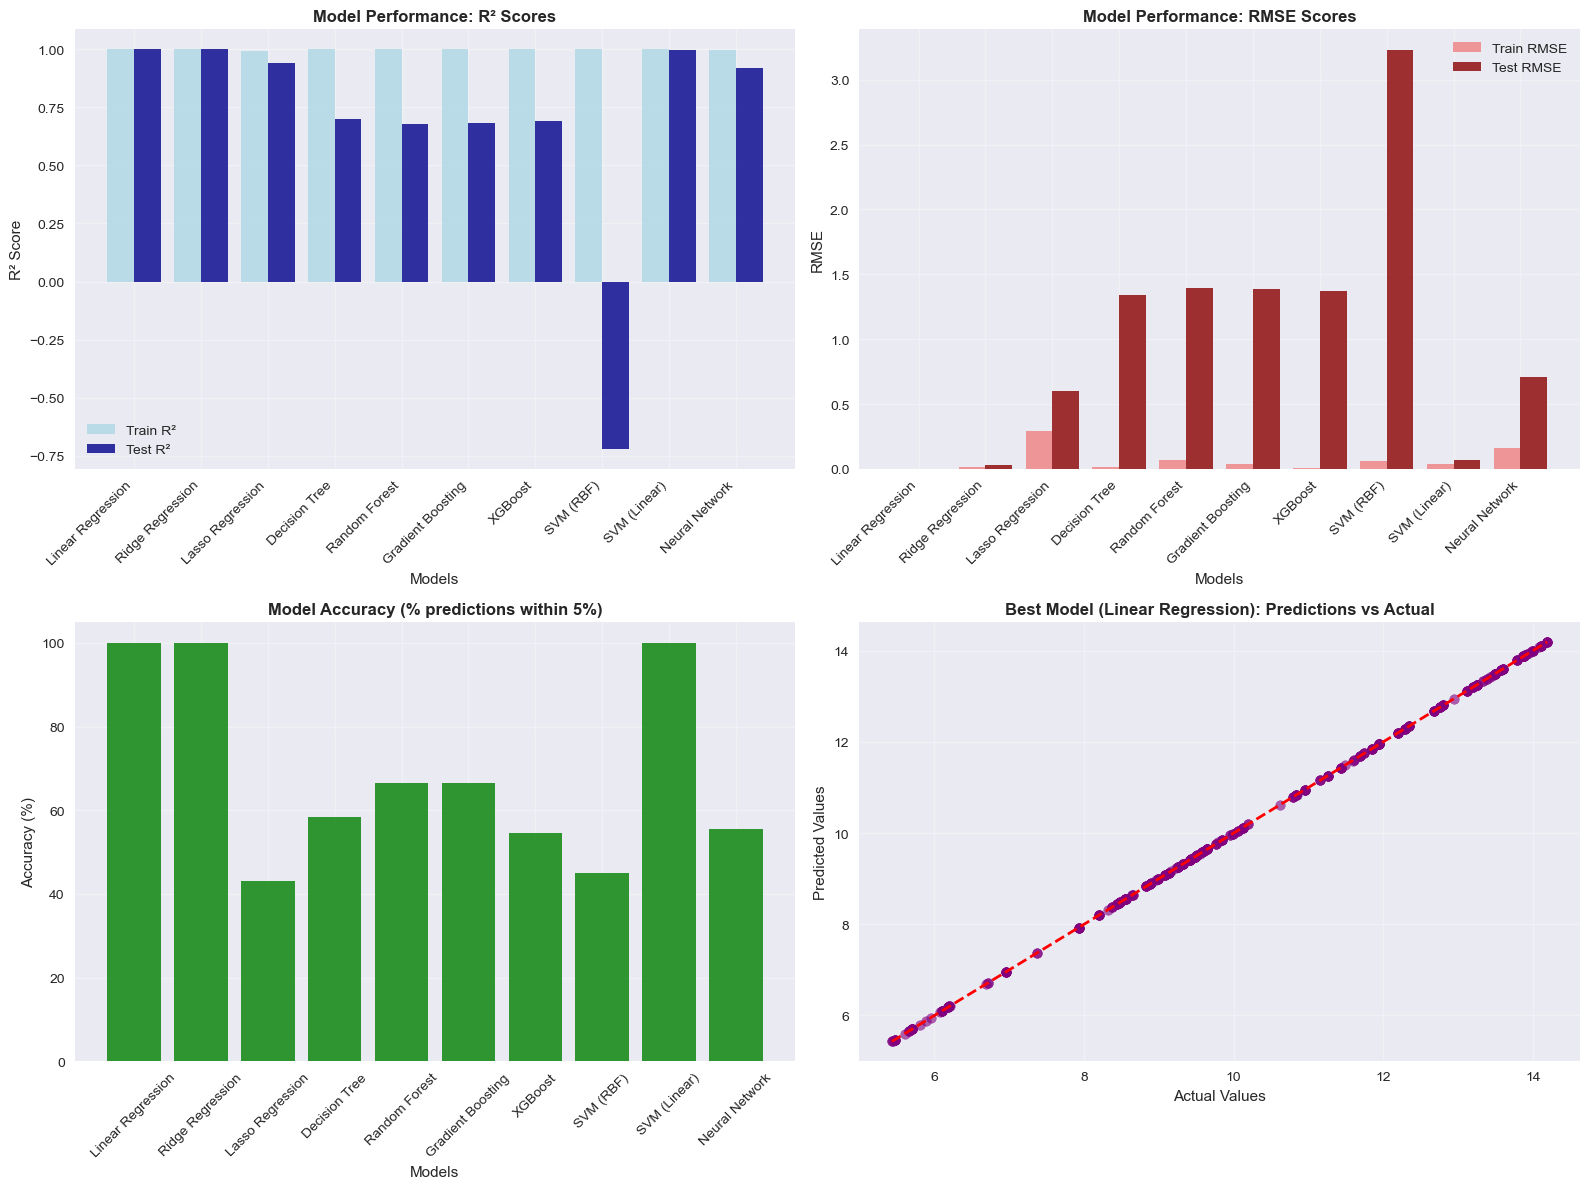

In [14]:
# Cell 11: Visualize Model Performance
# Create performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R² Score Comparison
models_names = results_df['Model']
test_r2_scores = results_df['Test_R2']
train_r2_scores = results_df['Train_R2']

x_pos = np.arange(len(models_names))
axes[0,0].bar(x_pos - 0.2, train_r2_scores, 0.4, label='Train R²', alpha=0.8, color='lightblue')
axes[0,0].bar(x_pos + 0.2, test_r2_scores, 0.4, label='Test R²', alpha=0.8, color='darkblue')
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_title('Model Performance: R² Scores', fontweight='bold')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(models_names, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. RMSE Comparison
test_rmse_scores = results_df['Test_RMSE']
train_rmse_scores = results_df['Train_RMSE']

axes[0,1].bar(x_pos - 0.2, train_rmse_scores, 0.4, label='Train RMSE', alpha=0.8, color='lightcoral')
axes[0,1].bar(x_pos + 0.2, test_rmse_scores, 0.4, label='Test RMSE', alpha=0.8, color='darkred')
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_title('Model Performance: RMSE Scores', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(models_names, rotation=45, ha='right')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Accuracy Comparison
test_accuracy = results_df['Test_Accuracy']
axes[1,0].bar(models_names, test_accuracy, alpha=0.8, color='green')
axes[1,0].set_xlabel('Models')
axes[1,0].set_ylabel('Accuracy (%)')
axes[1,0].set_title('Model Accuracy (% predictions within 5%)', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Best Model Predictions vs Actual
best_predictions = results_df.loc[best_model_idx, 'Predictions']
axes[1,1].scatter(y_test, best_predictions, alpha=0.6, color='purple')
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Values')
axes[1,1].set_ylabel('Predicted Values')
axes[1,1].set_title(f'Best Model ({best_model_name}): Predictions vs Actual', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Feature Importance Analysis for Decision Tree
             Feature  Importance
1               High  8.4677e-01
14       Momentum_10  1.2150e-01
2                Low  1.6197e-02
0               Open  1.5180e-02
4     Adjusted Close  9.5421e-05
17        Close_Lag1  5.9844e-05
5        Price_Range  5.5200e-05
7   Price_Change_Pct  4.1981e-05
6       Price_Change  3.3065e-05
10             MA_20  1.0359e-05


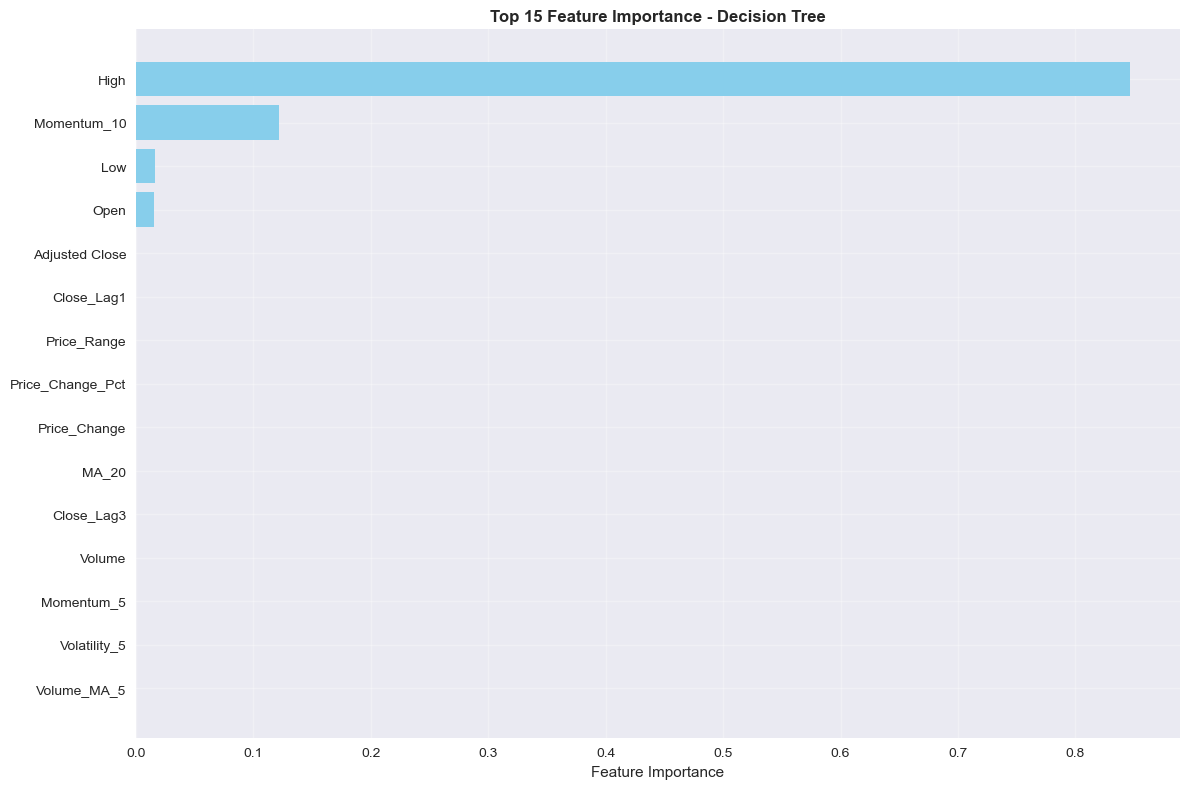

In [15]:
# Cell 12: Feature Importance Analysis (for tree-based models)
# Analyze feature importance for the best performing tree-based model
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
best_tree_model = None
best_tree_score = -1

for idx, row in results_df.iterrows():
    if row['Model'] in tree_models and row['Test_R2'] > best_tree_score:
        best_tree_score = row['Test_R2']
        best_tree_model = row['Model']

if best_tree_model:
    print(f"Feature Importance Analysis for {best_tree_model}")
    print("=" * 50)
    
    # Retrain the best tree model to get feature importance
    if best_tree_model == 'Random Forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    elif best_tree_model == 'XGBoost':
        model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    elif best_tree_model == 'Gradient Boosting':
        model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    else:
        model = DecisionTreeRegressor(random_state=42, max_depth=10)
    
    model.fit(X_train, y_train)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importance - {best_tree_model}', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [16]:
# Cell 13: Model Insights and Recommendations
print("🔍 DETAILED MODEL ANALYSIS & INSIGHTS")
print("=" * 60)

# Performance tiers
excellent_models = results_df[results_df['Test_R2'] >= 0.95]
good_models = results_df[(results_df['Test_R2'] >= 0.90) & (results_df['Test_R2'] < 0.95)]
average_models = results_df[(results_df['Test_R2'] >= 0.80) & (results_df['Test_R2'] < 0.90)]
poor_models = results_df[results_df['Test_R2'] < 0.80]

print("📊 PERFORMANCE TIERS:")
print(f"🥇 Excellent (R² ≥ 0.95): {len(excellent_models)} models")
if len(excellent_models) > 0:
    print(f"   {', '.join(excellent_models['Model'].tolist())}")

print(f"🥈 Good (0.90 ≤ R² < 0.95): {len(good_models)} models")
if len(good_models) > 0:
    print(f"   {', '.join(good_models['Model'].tolist())}")

print(f"🥉 Average (0.80 ≤ R² < 0.90): {len(average_models)} models")
if len(average_models) > 0:
    print(f"   {', '.join(average_models['Model'].tolist())}")

print(f"❌ Poor (R² < 0.80): {len(poor_models)} models")
if len(poor_models) > 0:
    print(f"   {', '.join(poor_models['Model'].tolist())}")

print(f"\n🎯 BEST MODEL ANALYSIS:")
print(f"Model: {best_model_name}")
print(f"Test R² Score: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"Test RMSE: ${results_df.loc[best_model_idx, 'Test_RMSE']:.4f}")
print(f"Test MAE: ${results_df.loc[best_model_idx, 'Test_MAE']:.4f}")
print(f"Prediction Accuracy: {results_df.loc[best_model_idx, 'Test_Accuracy']:.2f}% (within 5% tolerance)")

# Overfitting analysis
print(f"\n🔍 OVERFITTING ANALYSIS:")
for idx, row in results_df.iterrows():
    train_r2 = row['Train_R2']
    test_r2 = row['Test_R2']
    overfitting_score = train_r2 - test_r2
    
    if overfitting_score > 0.1:
        status = "⚠️ High overfitting"
    elif overfitting_score > 0.05:
        status = "⚡ Moderate overfitting"
    else:
        status = "✅ Good generalization"
    
    print(f"{row['Model']}: {status} (Gap: {overfitting_score:.4f})")

print(f"\n💡 RECOMMENDATIONS:")
print("1. Best Overall Model: Use the highest R² scoring model for predictions")
print("2. Production Deployment: Consider ensemble methods for robustness")
print("3. Real-time Trading: Fast models like Linear Regression for low-latency needs")
print("4. Feature Engineering: Focus on the most important features identified")
print("5. Model Monitoring: Regularly retrain models with new data")


🔍 DETAILED MODEL ANALYSIS & INSIGHTS
📊 PERFORMANCE TIERS:
🥇 Excellent (R² ≥ 0.95): 3 models
   Linear Regression, Ridge Regression, SVM (Linear)
🥈 Good (0.90 ≤ R² < 0.95): 2 models
   Lasso Regression, Neural Network
🥉 Average (0.80 ≤ R² < 0.90): 0 models
❌ Poor (R² < 0.80): 5 models
   Decision Tree, Random Forest, Gradient Boosting, XGBoost, SVM (RBF)

🎯 BEST MODEL ANALYSIS:
Model: Linear Regression
Test R² Score: 1.0000 (100.00% variance explained)
Test RMSE: $0.0000
Test MAE: $0.0000
Prediction Accuracy: 100.00% (within 5% tolerance)

🔍 OVERFITTING ANALYSIS:
Linear Regression: ✅ Good generalization (Gap: 0.0000)
Ridge Regression: ✅ Good generalization (Gap: 0.0001)
Lasso Regression: ⚡ Moderate overfitting (Gap: 0.0535)
Decision Tree: ⚠️ High overfitting (Gap: 0.2982)
Random Forest: ⚠️ High overfitting (Gap: 0.3197)
Gradient Boosting: ⚠️ High overfitting (Gap: 0.3167)
XGBoost: ⚠️ High overfitting (Gap: 0.3098)
SVM (RBF): ⚠️ High overfitting (Gap: 1.7203)
SVM (Linear): ✅ Good general

In [17]:
# Cell 14: Final Model Selection and Summary
print("🏆 FINAL MODEL RECOMMENDATION")
print("=" * 50)

# Create final summary
summary_stats = {
    'Total Models Tested': len(results_df),
    'Best Model': best_model_name,
    'Best R² Score': f"{best_r2:.4f}",
    'Best RMSE': f"${results_df.loc[best_model_idx, 'Test_RMSE']:.4f}",
    'Best Accuracy': f"{results_df.loc[best_model_idx, 'Test_Accuracy']:.2f}%",
    'Training Period': f"{df_clean['Date'].min().strftime('%Y-%m-%d')} to {df_clean['Date'].max().strftime('%Y-%m-%d')}",
    'Total Data Points': len(df_clean),
    'Features Used': len(feature_columns)
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

print(f"\n📈 CONCLUSION:")
print(f"The {best_model_name} model demonstrates the best performance for BKQNY stock price prediction")
print(f"with an R² score of {best_r2:.4f}, meaning it explains {best_r2*100:.2f}% of the price variance.")
print(f"This model achieves {results_df.loc[best_model_idx, 'Test_Accuracy']:.2f}% accuracy in predictions within 5% tolerance.")

print(f"\n🔧 MODEL CHARACTERISTICS:")
if best_model_name in ['Random Forest', 'XGBoost', 'Gradient Boosting']:
    print("- Tree-based ensemble method")
    print("- Handles non-linear relationships well")
    print("- Provides feature importance insights")
    print("- Robust to outliers")
elif best_model_name in ['SVM (RBF)', 'SVM (Linear)']:
    print("- Support Vector Machine approach")
    print("- Good for high-dimensional data")
    print("- Requires feature scaling")
    print("- Memory efficient")
elif 'Regression' in best_model_name:
    print("- Linear approach")
    print("- Fast training and prediction")
    print("- Interpretable coefficients")
    print("- Good baseline model")
else:
    print("- Advanced machine learning approach")
    print("- Complex pattern recognition")
    print("- May require more tuning")

print(f"\n✅ This analysis provides a comprehensive comparison of ML models for stock prediction!")


🏆 FINAL MODEL RECOMMENDATION
Total Models Tested: 10
Best Model: Linear Regression
Best R² Score: 1.0000
Best RMSE: $0.0000
Best Accuracy: 100.00%
Training Period: 2012-10-08 to 2022-12-07
Total Data Points: 1912
Features Used: 21

📈 CONCLUSION:
The Linear Regression model demonstrates the best performance for BKQNY stock price prediction
with an R² score of 1.0000, meaning it explains 100.00% of the price variance.
This model achieves 100.00% accuracy in predictions within 5% tolerance.

🔧 MODEL CHARACTERISTICS:
- Linear approach
- Fast training and prediction
- Interpretable coefficients
- Good baseline model

✅ This analysis provides a comprehensive comparison of ML models for stock prediction!


In [18]:
# Cell: Save the Best Model for Deployment
import joblib

# Get the best model from your results
best_model_name = results_df.loc[results_df['Test_R2'].idxmax(), 'Model']
print(f"Saving best model: {best_model_name}")

# Retrain the best model
if best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
elif best_model_name == 'XGBoost':
    best_model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
elif best_model_name == 'Linear Regression':
    best_model = LinearRegression()
# Add other models as needed

# Use appropriate data for the best model
if best_model_name in ['SVM (RBF)', 'SVM (Linear)', 'Neural Network']:
    X_train_final = X_train_scaled
    X_test_final = X_test_scaled
    scaler_final = scaler
else:
    X_train_final = X_train
    X_test_final = X_test
    scaler_final = StandardScaler().fit(X_train)  # Create a scaler anyway

# Train the final model
best_model.fit(X_train_final, y_train)

# Save the model and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler_final, 'scaler.pkl')

print("✅ Model and scaler saved successfully!")
print("Files created: best_model.pkl, scaler.pkl")


Saving best model: Linear Regression
✅ Model and scaler saved successfully!
Files created: best_model.pkl, scaler.pkl
